<center><h1>Blood Donation Analysis</h1></center>

### Importing the library

In [58]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [59]:
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [60]:
#Importing all the required model for model comparision
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

### Reading the Data

In [61]:
train=pd.read_csv("blood-train.csv")
test=pd.read_csv("blood-test.csv")

In [62]:
#Printing the train and test size
print("Train Shape : ",train.shape)
print("Test Shape : ",test.shape)

Train Shape :  (576, 6)
Test Shape :  (200, 5)


In [63]:
#Printing first five rows of data
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [64]:
#Counting the number of people who donated and not donated
train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [65]:
#Storing dependent variable in Y
Y=train.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [66]:
#Printing last 5 rows
train.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [67]:
#Removing Unnamed: 0 columns
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [68]:
#Printing firsr  rows
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [69]:
#Merging both train and test data
df=pd.merge(train,test)

In [70]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [71]:
#Setting the independent variable and dependent variable
X=df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


### Data Exploration

In [72]:
# Statistics of the data
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


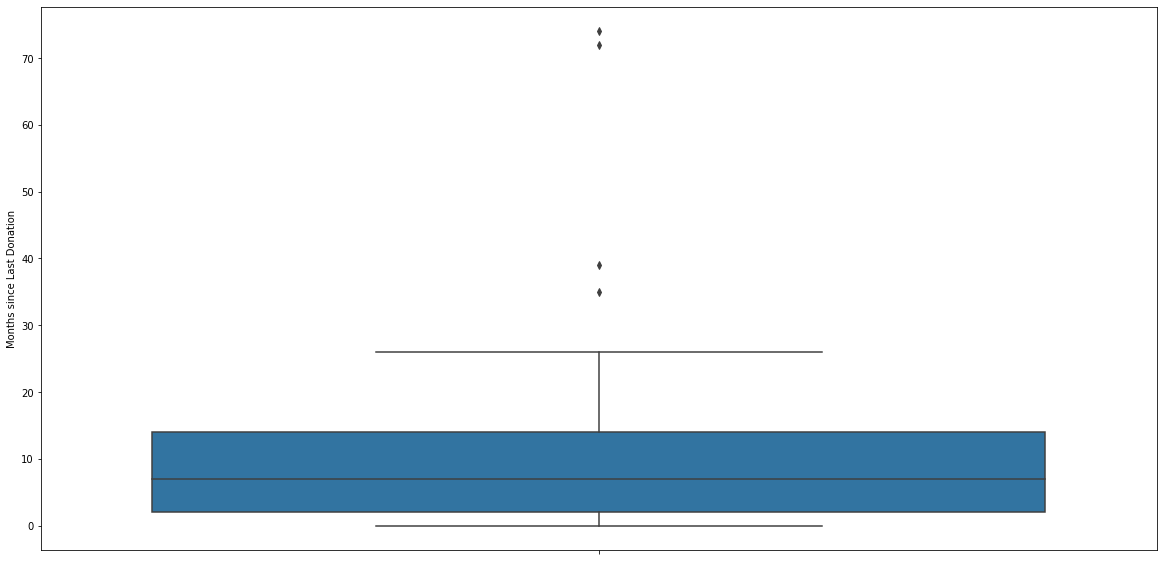

In [73]:
#Boxplot for Months since Last Donation
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Months since Last Donation",data=old_train)

We see from the above boxplot that the maximum people have donated blood in nearby 10 months.

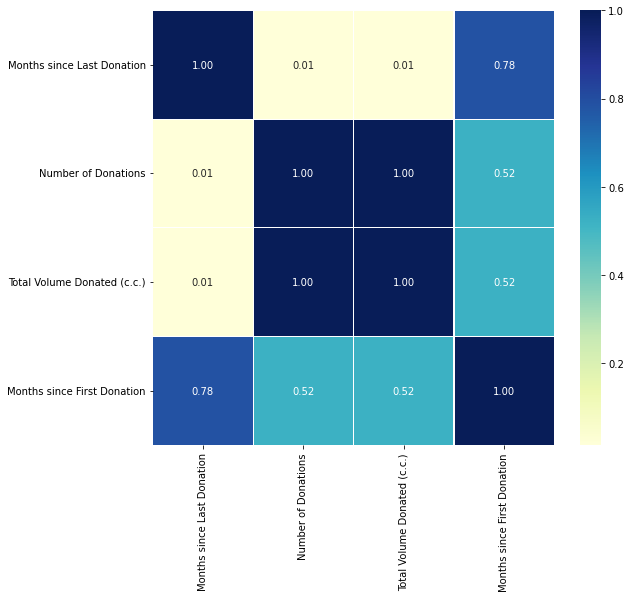

In [74]:
#Correlation between all variables [Checking how different variable are related]
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [75]:
#Printing all unique value for Month Since Last donation
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72])

### Feature Engineering

In [76]:
#Creating new variable for calculating how many times a person have donated
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

In [77]:
#Seeing first five rows of the DataFrame
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


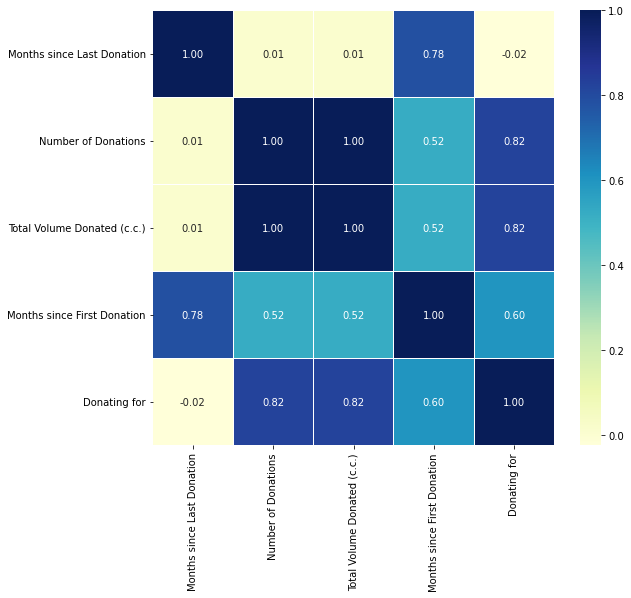

In [78]:
#Correlation between all variables
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

Since Total Volume Donated (c.c.) have the very high correlation with other variables so we are dropping the variable.

In [79]:
#Dropping the unnecessary column
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [80]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [81]:
#Shape of independent variable
X.shape

(810, 4)

### Feature Transformation

In [82]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)

In [83]:
train=X[:576]

In [84]:
train.shape

(576, 4)

In [85]:
test=X[576:]

In [86]:
Y=Y[:576]

In [87]:
Y.shape

(576,)

### Model Building

In [88]:
#Splitting into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

In [89]:
#Building the model
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [90]:
#Predicting on the test data
pred=logreg.predict(xtest)

In [91]:
accuracy_score(pred,ytest)

0.7155172413793104

In [92]:
#Printing the roc_auc_score
roc_auc_score(pred,ytest)

0.7321428571428571

In [93]:
### SVC classifier
SVMC = SVC(probability=True)
#Fitting the model
SVMC.fit(train,Y)

SVC(probability=True)

In [94]:
#Predicting on the test data
pred=SVMC.predict(xtest)

In [95]:
accuracy_score(pred, ytest)

0.7844827586206896

In [96]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]])

In [97]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8429487179487177

In [98]:
#Buildin the model
RFC = RandomForestClassifier()
#Fitting the model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [99]:
#Predicting the test data result
pred=RFC.predict(xtest)

In [100]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[79, 27],
       [ 2,  8]])

In [101]:
accuracy_score(pred, ytest)

0.75

In [102]:
#Printingthe roc auc score
roc_auc_score(pred,ytest)

0.7726415094339623

In [103]:
#Building the model
model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [104]:
#Fitting the model
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [105]:
#Predicting the test data
pred=model.predict(xtest)

In [106]:
accuracy_score(pred, ytest)

0.7672413793103449

In [107]:
#printing the confusion matrix
confusion_matrix(pred,ytest)

array([[79, 25],
       [ 2, 10]])

In [108]:
#Printing accuracy score
accuracy_score(pred,ytest)

0.7672413793103449

In [109]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.796474358974359

In [110]:
#Building the Model
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [111]:
#Predicting from the fitted model on test data
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [112]:
#printing confusion matrix
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]])

In [113]:
#Printing roc auc score
roc_auc_score(pred,ytest)

0.796474358974359

In [114]:
accuracy_score(pred, ytest)

0.7672413793103449